### Actividad Módulo 7: Pandas: Dataframes, lectura y exportación de archivos

Descargar archivo Iris.csv y contestar las siguientes preguntas:
1. Determinar en una sola tabla: Media, desviación estándar y mediana para el ancho del petalo de cada tipo de flor para aquellos registros cuyo ancho de sépalo es mayor o igual a 3.5 y el largo del sépalo es mayor que 5
2. Calcule el número de registros que se utilizaron para obtener los resultados del problema 1
3. Agregar una nueva columna al DF generado al problema 1 que sea resultado de estandarizar los valores del ancho del pétalo para cada registros. Denorminar "petal.width.st" y calcularla como (petal.width - media(petal.width)) / Desv. Estándar(petal.width)
4. Renombrar las columnas del DF "variety" y "petal.width.st" a "Variedad" y "Ancho Est. Pétalo"
5. Exporte el resultado del DF obtenido del problema 4 a un archivo "Iris2.csv"
6. Investigue cómo generar un gráfico de disperción para la base original Iris que relacione la variable "petal.width" y "petal.length"

In [34]:
import numpy as np
import pandas as pd

iris_df = pd.read_csv('D:\Documentos\DataAnalysis\EBAC\Python\Modulo7\iris.csv')
# iris_df.head(3)

In [35]:
# 1.
# Definir funciones a utilizar
def mean(x): return x.mean()
def std_dev(x): return x.std()
def median(x): return x.quantile(.5)

# Slice the df
iris_ejercicio1 = iris_df[(iris_df['sepal.width'] >= 3.5) & (iris_df['sepal.length'] > 5)]

# Group by variety y aplicar las funciones
iris_ejercicio1.groupby('variety')['petal.width'].agg([mean, std_dev, median])

,mean,std_dev,median
variety,,,
Setosa,0.270588,0.098518,0.2
Virginica,2.233333,0.251661,2.2


In [36]:
# 2. Conseguir longitud del df del inciso anterior
len(iris_ejercicio1)

20

In [37]:
# 3. Generar nueva columna
iris_ejercicio3 = iris_df
iris_ejercicio3['petal.width.st'] = (iris_ejercicio3['petal.width']-iris_ejercicio3['petal.width'].mean()) / iris_ejercicio3['petal.width'].std()
iris_ejercicio3.head(3)

,sepal.length,sepal.width,petal.length,petal.width,variety,petal.width.st
0,5.1,3.5,1.4,0.2,Setosa,-1.311052
1,4.9,3.0,1.4,0.2,Setosa,-1.311052
2,4.7,3.2,1.3,0.2,Setosa,-1.311052


In [38]:
# 4. Renombrar columnas
iris_ejercicio4 = iris_ejercicio3
iris_ejercicio4.rename(columns={'variety':'Variedad', 'petal.width.st':'Ancho Est. Pétalo'}, inplace=True)
iris_ejercicio4.head(3)

,sepal.length,sepal.width,petal.length,petal.width,Variedad,Ancho Est. Pétalo
0,5.1,3.5,1.4,0.2,Setosa,-1.311052
1,4.9,3.0,1.4,0.2,Setosa,-1.311052
2,4.7,3.2,1.3,0.2,Setosa,-1.311052


In [39]:
# 5. Exportar DF a un csv
iris_ejercicio4.to_csv('Iris2.csv')

<AxesSubplot: xlabel='petal.width', ylabel='petal.length'>

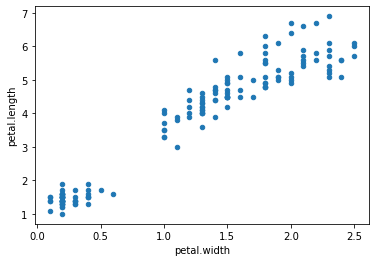

In [40]:
#6 Scatter plot

iris_ejercicio4.plot(x='petal.width', y='petal.length', kind='scatter')